In [23]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [24]:
!git clone https://github.com/eagletrt/recruiting-sw.git

Cloning into 'recruiting-sw'...
remote: Enumerating objects: 387, done.
remote: Counting objects: 100% (387/387), done.
remote: Compressing objects: 100% (270/270), done.
remote: Total 387 (delta 118), reused 338 (delta 92), pack-reused 0
Receiving objects: 100% (387/387), 2.86 MiB | 8.07 MiB/s, done.
Resolving deltas: 100% (118/118), done.


In [25]:
%cd /content/recruiting-sw/driverless/project_1

/content/recruiting-sw/driverless/project_1


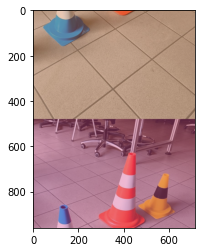

In [26]:
img= Image.open ('corrupted.png')
x,y= img.size
i=np.array(img)
plt.imshow(i)

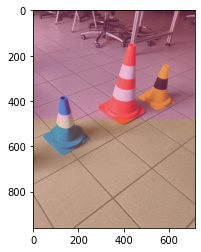

In [27]:
#Flip Image 
m= np.zeros((y,x,3), dtype=np.uint8)
m[:int(y/2),:]= i[int(y/2):,:]
m[int(y/2):,:]= i[:int(y/2),:]
plt.imshow(m)

In [28]:
#Modify the correct pixels to processed pixels 
#Apply MINMAX algorithm to limit the pixels values between 50 and 200
(np.round(((np.array([250, 158, 3]))/255)*150 +50)).astype("uint8"), (np.round(((np.array([40, 195, 240]))/255)*150 +50)).astype("uint8")

(array([197, 143,  52], dtype=uint8), array([ 74, 165, 191], dtype=uint8))

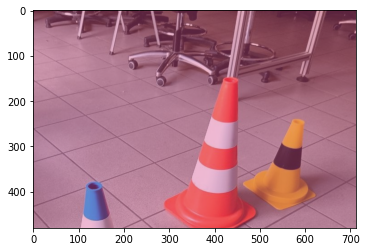

In [29]:
#Each of the two halves of the image has been modifed differently
#The first half 

mb= np.zeros((int(y/2),x,3), dtype=np.uint8)
mb[:,:]= m[:int(y/2),:]
plt.imshow(mb)

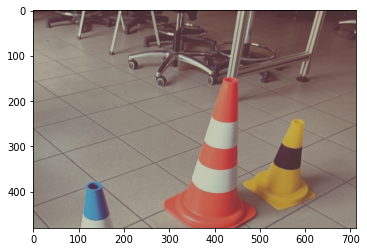

In [30]:
#Recover the first half 
correct_pixel=[191, 165, 74]

# Estimate the scaling factors for each color channel
scaling_factors = correct_pixel / mb[267, 564]

# Apply the scaling factors to the affected image to correct the chromatic aberration
corrected_image1 = np.clip(mb * scaling_factors, 50, 200).astype(np.uint8)
plt.imshow(corrected_image1)

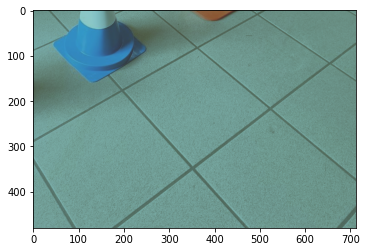

In [31]:
#The second half 
ma= np.zeros((int(y/2),x,3), dtype=np.uint8)
ma[:,:]= m[int(y/2):,:]

#flip the BGR (OpenCV format) format into RGB format (PIL)
correct_pixel=[52, 143, 197]

# Estimate the scaling factors for each color channel
scaling_factors = correct_pixel / ma[541- int(y/2), 128]

# Apply the scaling factors to the affected image to correct the chromatic aberration
corrected_image2 = np.clip(ma * scaling_factors, 50, 200).astype(np.uint8)
plt.imshow(corrected_image2)

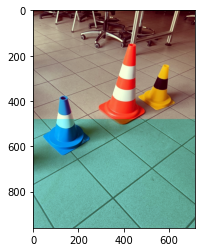

In [32]:
#stack the two halves of the image

mr= np.zeros((y,x,3), dtype=np.uint8)
mr[:int(y/2),:]= corrected_image1
mr[int(y/2):,:]= corrected_image2
mr = (np.round(((mr-50)/150)*255)).astype(np.uint8)

plt.imshow(mr)

<h4>The second half of the image still looks corrupted. To fix this, we'll take a pixel from the bottom of the first half and use it to correct the second half.</h4> 

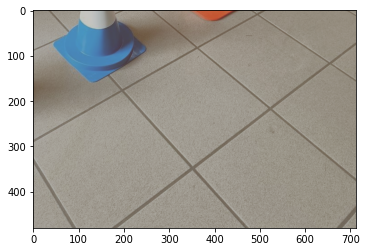

In [33]:
correct_pixel=corrected_image1[475, 10]
# Estimate the scaling factors for each color channel
scaling_factors = correct_pixel / ma[5, 10]

# Apply the scaling factors to the affected image to correct the chromatic aberration
corrected_image2 = np.clip(ma * scaling_factors, 50, 200).astype(np.uint8)
#print(corrected_image2[541-int(y/2), 128])
plt.imshow(corrected_image2)

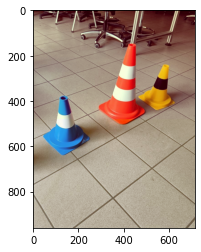

In [34]:
mr= np.zeros((y,x,3), dtype=np.uint8)
mr[:480,:]= corrected_image1
mr[480:,:]= corrected_image2
mr = (np.round(((mr-50)/150)*255)).astype(np.uint8)

plt.imshow(mr)
plt.imsave('/content/recovered.png', mr)